# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Read Data from csv file

In [2]:
df = pd.read_csv(r'C:\Users\RDhingra\Documents\Machine learning training\edwisor\Project\train_cab\train_cab.csv',parse_dates=["pickup_datetime"])

# Analysing DataFrame

In [3]:
#check top 5 rows
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0


In [4]:
#Check Shape of dataframe
df.shape

(16067, 7)

In [5]:
#dataframe information displaying column names,their data types and non-null values count
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16067 entries, 0 to 16066
Data columns (total 7 columns):
fare_amount          16043 non-null object
pickup_datetime      16067 non-null object
pickup_longitude     16067 non-null float64
pickup_latitude      16067 non-null float64
dropoff_longitude    16067 non-null float64
dropoff_latitude     16067 non-null float64
passenger_count      16012 non-null float64
dtypes: float64(5), object(2)
memory usage: 878.7+ KB


In [6]:
# we see that there are 2 Categorical variables and 5 numeric(float) variables

# Fare_amount is object type, need to be converted into float
# Datetime data type needs to be converted to datetime data type
# Passenger count should be integer and not float


In [7]:
# Since fare_amount is numeric , let's convert it into numeric data type 

df['fare_amount'] = pd.to_numeric(df['fare_amount'],errors='coerce')

#check data type again
df['fare_amount'].dtype

dtype('float64')

In [8]:
#Change datatype of pickup datetime to pandas datetime type
df["pickup_datetime"]=pd.to_datetime(df["pickup_datetime"],errors = 'coerce')

df["pickup_datetime"].dtype

datetime64[ns, UTC]

In [9]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,16042.000000,16067.000000,16067.000000,16067.000000,16067.000000,16012.000000
mean,15.015004,-72.462787,39.914725,-72.462328,39.897906,2.625070
std,430.460945,10.578384,6.826587,10.575062,6.187087,60.844122
min,-3.000000,-74.438233,-74.006893,-74.429332,-74.006377,0.000000
25%,6.000000,-73.992156,40.734927,-73.991182,40.734651,1.000000
50%,8.500000,-73.981698,40.752603,-73.980172,40.753567,1.000000
75%,12.500000,-73.966838,40.767381,-73.963643,40.768013,2.000000
max,54343.000000,40.766125,401.083332,40.802437,41.366138,5345.000000


In [10]:
# fare amount has negative values which need to be removed , it should be > 0
# passenger count has minimum value as 0, it should be > 0
# Also, fare amount and passenger count have very large maximum values
#so we need to check the values in both and remove noise and potential outliers
# lets first check if there are any missing values

# Missing Value Analysis

In [11]:
#check missing values in df
df.isnull().sum()

fare_amount          25
pickup_datetime       1
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
passenger_count      55
dtype: int64

# Treat Missing Values

In [12]:
#Impute Missing Values of fare_amount and passenger_count with the median value
df['fare_amount'] = df['fare_amount'].fillna(df['fare_amount'].median())
df['passenger_count'] = df['passenger_count'].fillna(df['passenger_count'].median())

#drop one row containing missing pickup datetime
df.dropna(inplace=True)

#check for missing values

df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [13]:
df.shape

(16066, 7)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000B754F98>,
      dtype=object)

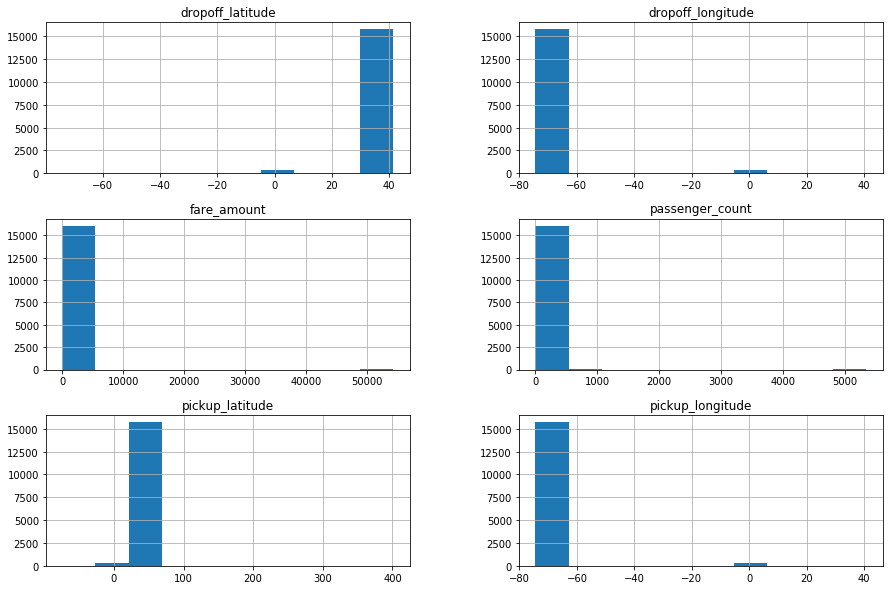

In [14]:
df.hist(bins=10,figsize=(15,10))

In [15]:
# we can see that the data is not uniformly distributed and contains outliers

# Load test data

In [16]:
#read test data
df_test = pd.read_csv(r'C:\Users\RDhingra\Documents\Machine learning training\edwisor\Project\test\test.csv',parse_dates=["pickup_datetime"])

In [17]:
#check top 5 rows of test data
df_test.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24+00:00,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24+00:00,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44+00:00,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12+00:00,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12+00:00,-73.966046,40.789775,-73.988565,40.744427,1


In [18]:
#check data types
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 6 columns):
pickup_datetime      9914 non-null datetime64[ns, UTC]
pickup_longitude     9914 non-null float64
pickup_latitude      9914 non-null float64
dropoff_longitude    9914 non-null float64
dropoff_latitude     9914 non-null float64
passenger_count      9914 non-null int64
dtypes: datetime64[ns, UTC](1), float64(4), int64(1)
memory usage: 464.8 KB


In [19]:
#check summary statistics for test data
df_test.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


In [20]:
# Check if there are any Missing Values in test data
df_test.isnull().sum()

pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [21]:
df_test.columns

Index(['pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [22]:
# lets change passenger count from numeric to categorical as it has fixed number of values only

df_test['passenger_count'] = df_test['passenger_count'].astype('category')


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000BFD8C50>,
      dtype=object)

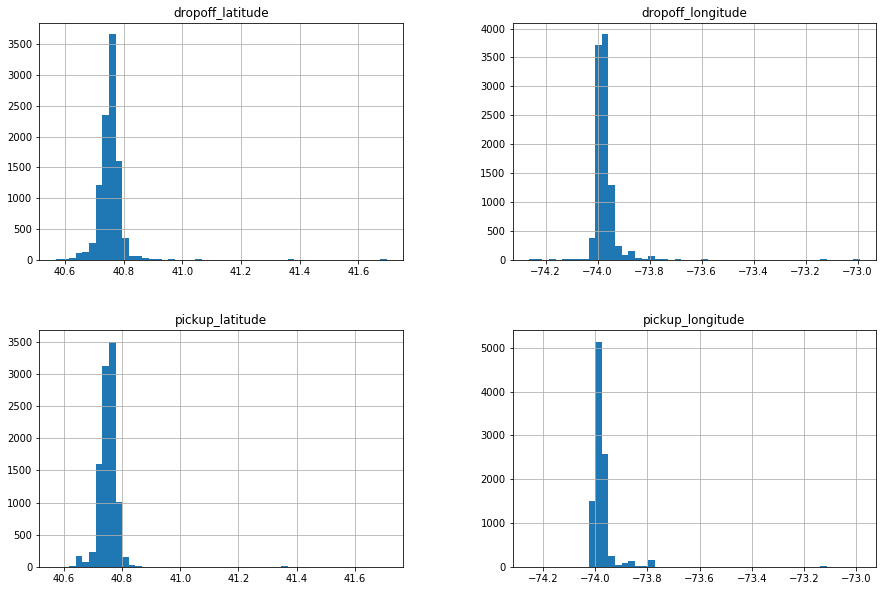

In [23]:
#Check distribution plots for test data
df_test.hist(bins=50,figsize=(15,10))

# Outlier Analysis

In [24]:
#get list of numeric columns
num_features = [col for col in df if (df[col].dtypes == 'float64' or df[col].dtypes == 'int64')]
num_features

['fare_amount',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'passenger_count']

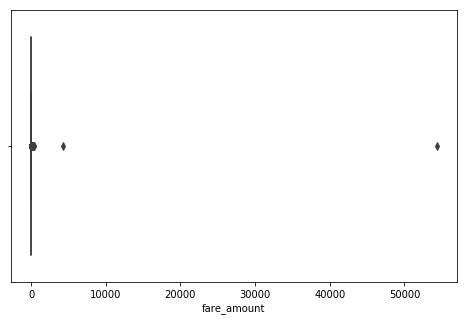

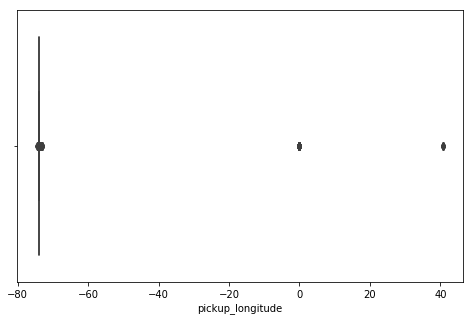

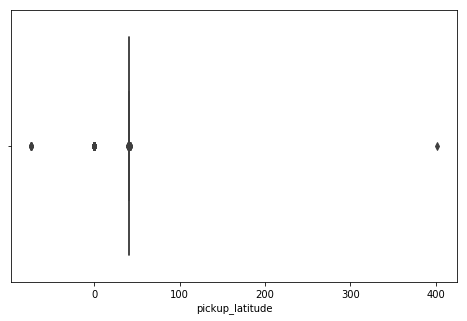

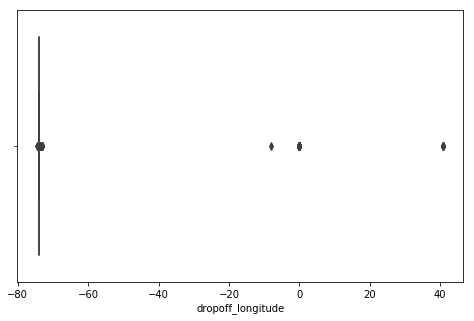

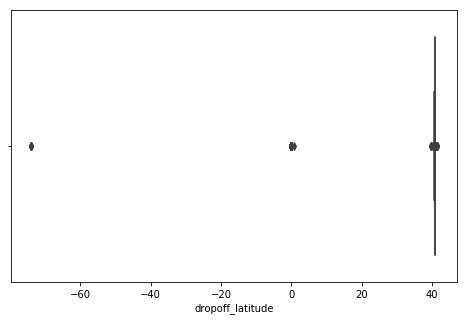

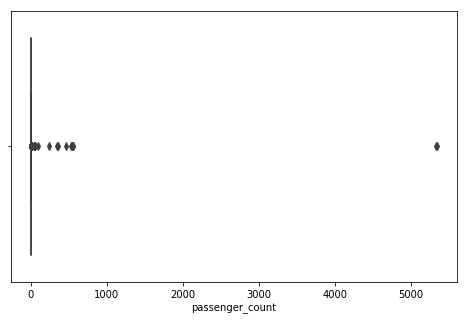

In [25]:
#Lets plot boxplot for numeric columns to visualize outliers
for i in num_features:
    fig, ax = plt.subplots()
    fig.set_size_inches(8,5)
    #plt.xlim(-10,10)
    sns.boxplot(x=i,data=df,ax=ax)

In [26]:
#we can see boxplot is not much helpful to visualize as the data is not uniformly distributed and contains outliers

Text(0, 0.5, 'Count')

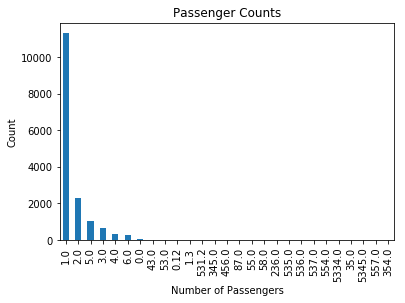

In [27]:
#Passenger count

#we see that there are 0 and values > 6 in passenger count

#lets visualize passenger counts frequency through bar plot
df['passenger_count'].value_counts().plot.bar();
plt.title('Passenger Counts')
plt.xlabel('Number of Passengers')
plt.ylabel('Count')

In [28]:
#Change datatype of passenger count to int as passenger count can be whole number not float
df['passenger_count'] = df['passenger_count'].astype('int64')

#passenger count should be > 0 and less than 7

df = df[(df['passenger_count'] > 0) & (df['passenger_count'] < 7)]

# lets change passenger count from numeric to categorical as it has fixed number of values only

df['passenger_count'] = df['passenger_count'].astype('category')



Text(0, 0.5, 'Count')

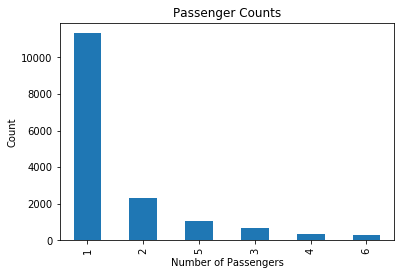

In [29]:
#Lets again visualize the passenger count 
df['passenger_count'].value_counts().plot.bar();
plt.title('Passenger Counts')
plt.xlabel('Number of Passengers')
plt.ylabel('Count')

In [30]:
#lets create list of numeric column names
num_features = [col for col in df if (df[col].dtypes == 'float64' or df[col].dtypes == 'int64')]
num_features

['fare_amount',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude']

In [31]:
#fare amount cannot be negative or 0, lets filter out those rows where fare amount <= 0
df = df[df['fare_amount'] > 0]

df.shape

(15984, 7)

In [32]:
# Treating Outliers
# Removing Outliers
num_features = [col for col in df if (df[col].dtypes == 'float64' or df[col].dtypes == 'int64')]

#lets calculate iqr and min and max value for all numeric variables
for i in num_features:

    q75, q25 = np.percentile(df.loc[:,i], [75 ,25])
    iqr = q75 - q25

    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    
    data = df[(df[i] < min_val) | (df[i] > max_val)]
    
    if len(data[i]) > 0:
        print(i)
        print("(IQR = {})Outlier are anything outside this range: ({},{})".format(iqr,min_val,max_val))
        print("Outliers out of total = {} are \n {}".format(df[i].size,len(data[i])))
    
    #remove outliers
    df = df[(df[i] > min_val) & (df[i] < max_val)]
    
   
df.shape

fare_amount
(IQR = 6.5)Outlier are anything outside this range: (-3.75,22.25)
Outliers out of total = 15984 are 
 1394
pickup_longitude
(IQR = 0.023802360000004796)Outlier are anything outside this range: (-74.02813354,-73.93292409999998)
Outliers out of total = 14590 are 
 569
pickup_latitude
(IQR = 0.02940200000000459)Outlier are anything outside this range: (40.69337899999999,40.81098700000001)
Outliers out of total = 14021 are 
 235
dropoff_longitude
(IQR = 0.022649999999998727)Outlier are anything outside this range: (-74.025825,-73.935225)
Outliers out of total = 13786 are 
 253
dropoff_latitude
(IQR = 0.029341999999999757)Outlier are anything outside this range: (40.694076,40.811444)
Outliers out of total = 13533 are 
 316


(13217, 7)

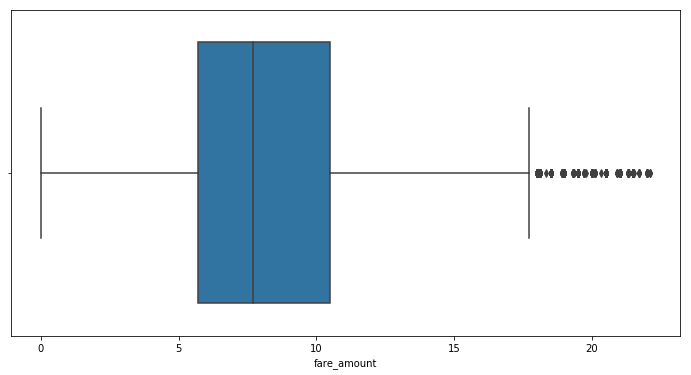

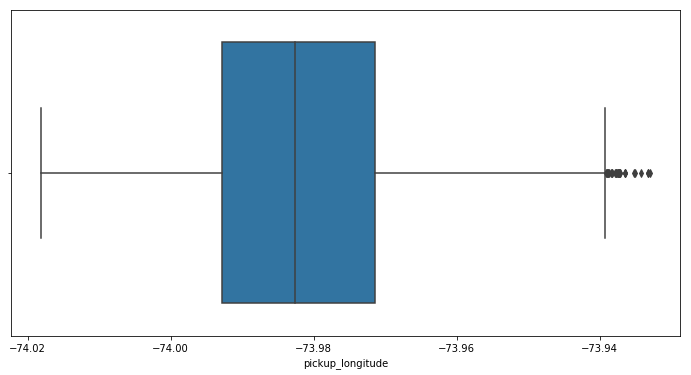

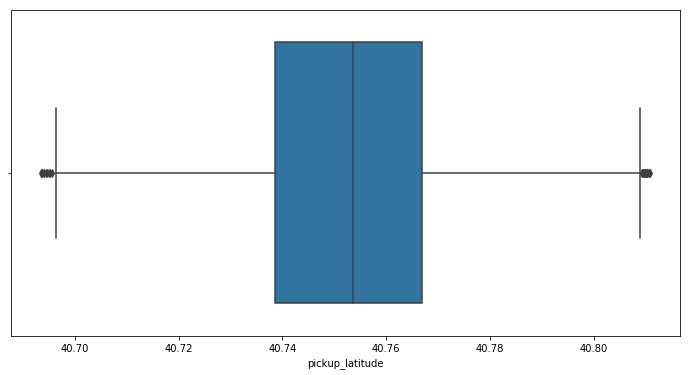

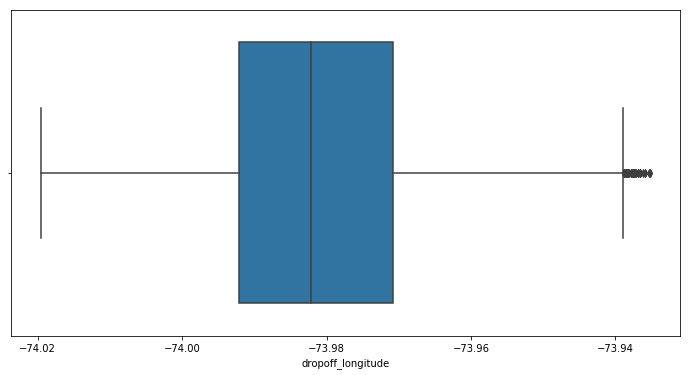

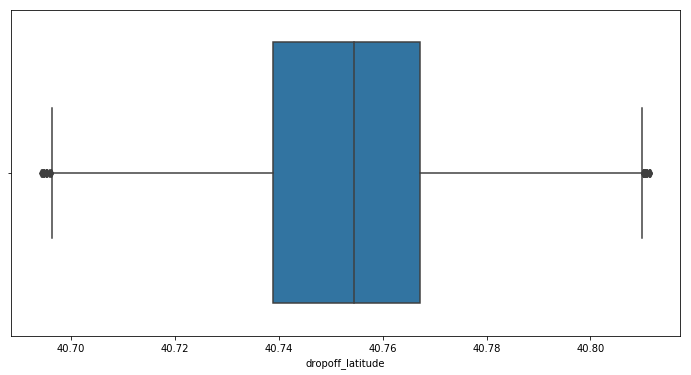

In [33]:

#lets plot boxplot again
for i in num_features:
    fig, ax = plt.subplots()
    fig.set_size_inches(12,6)
    #plt.xlim(-10,10)
    sns.boxplot(x=i,data=df,ax=ax)
    


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000C266668>,
      dtype=object)

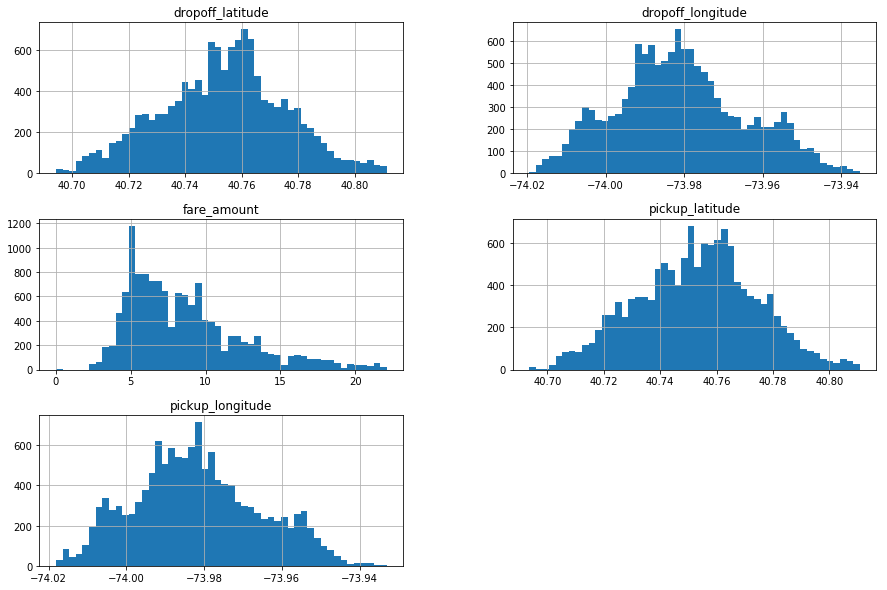

In [34]:
#lets visualize distribution of numeric variables through histogram :

df.hist(bins=50,figsize=(15,10))

C:\Users\RDhingra\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


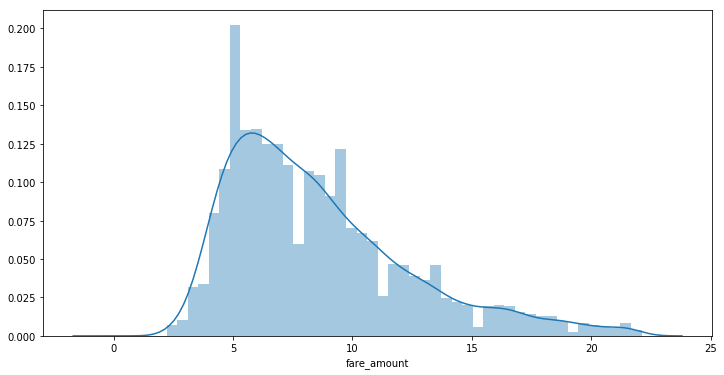

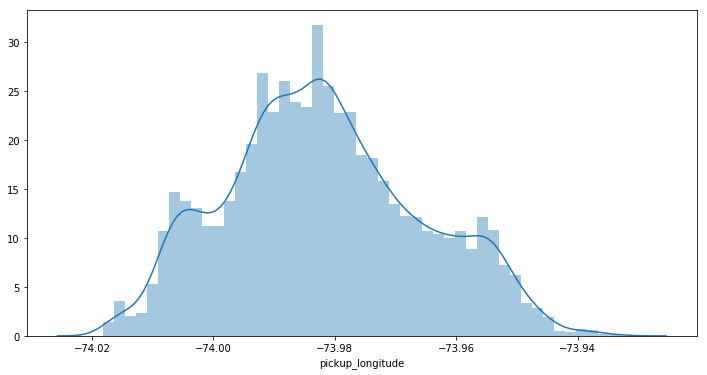

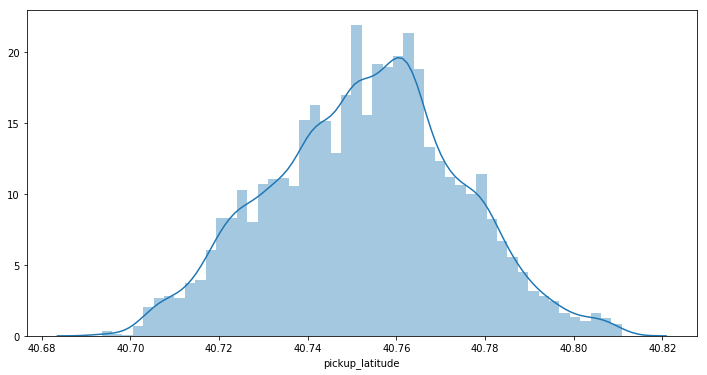

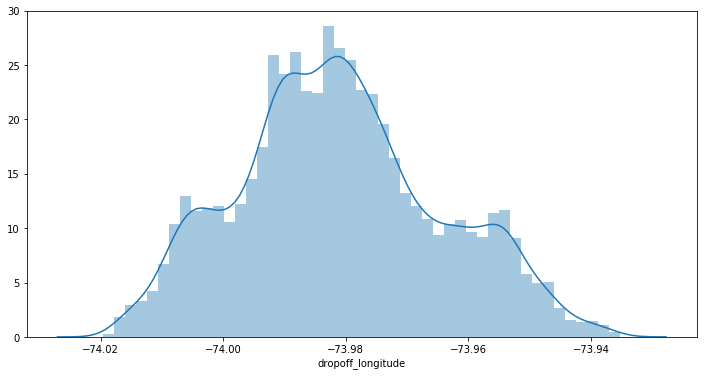

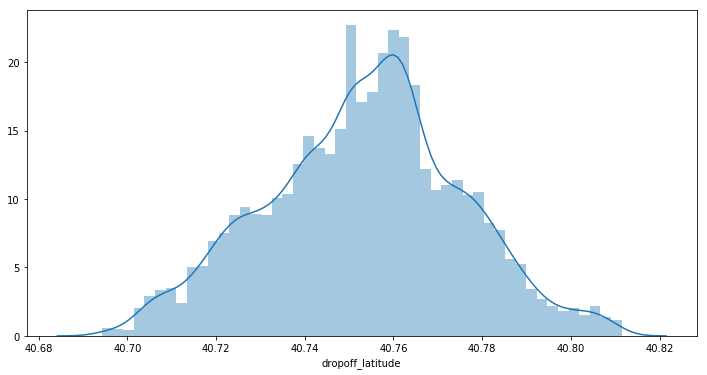

In [35]:

# we can also visualize distplot 
for i in num_features:
    fig, ax = plt.subplots()
    fig.set_size_inches(12,6)
    #plt.xlim(-10,10)
    sns.distplot(df[i],ax=ax)
    

# Feature Engineering

In [36]:
#Lets create more variables out of pickup Date as month, day and time affects the cab rent fare

def add_date_features(df):
    
    #add new feaures derived from pickup date
    df['year'] = df['pickup_datetime'].dt.year
    df['month'] = df['pickup_datetime'].dt.month
    df['date'] = df['pickup_datetime'].dt.day
    df['hour'] = df['pickup_datetime'].dt.hour
    #df['weekday_name'] = df['pickup_datetime'].dt.weekday_name
    df['weekday'] = df['pickup_datetime'].apply(lambda x: x.weekday())
    
    # Change data types to categorical 
    df['month'] = df['month'].astype('category')
    df['year'] = df['year'].astype('category')
    df['date'] = df['date'].astype('category')
    df['hour'] = df['hour'].astype('category')
    df['weekday'] = df['weekday'].astype('category')
    
    #drop the pickup datetime column as we have extracted features out of this and this is not required now
    df.drop('pickup_datetime',axis=1,inplace=True)
    
    #return the dataframe
    #return df

#call the function on both original and test data
add_date_features(df)
add_date_features(df_test)


In [37]:
def add_distance_features(df):

    lat1 = df['pickup_latitude']
    lat2 = df['dropoff_latitude']
    lon1 = df['pickup_longitude']
    lon2 = df['dropoff_longitude']
    
    # Add new features
    df['latdiff'] = (lat2 - lat1)
    df['londiff'] = (lon2 - lon1)

    # Add distance
    df['euclidean'] = (df['latdiff'] ** 2 + df['londiff'] ** 2) ** 0.5
    df['manhattan'] = np.abs(lat1-lat2) + np.abs(lon1-lon2)
    

#call the function on both original and test data
add_distance_features(df)
add_distance_features(df_test)

In [38]:
#lets see our dataframe top 5 rows again
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,date,hour,weekday,latdiff,londiff,euclidean,manhattan
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,16,1,0.070701,0.036780,0.079696,0.107481
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,0,3,-0.010708,-0.008504,0.013674,0.019212
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,4,5,0.024949,-0.004437,0.025340,0.029386
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,7,1,0.015754,0.011440,0.019470,0.027194
5,12.1,-74.000964,40.731630,-73.972892,40.758233,1,2011,1,6,9,3,0.026603,0.028072,0.038675,0.054675


In [39]:
#for the test data as well
df_test.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,date,hour,weekday,latdiff,londiff,euclidean,manhattan
0,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,27,13,1,-0.019970,-0.008110,0.021554,0.028080
1,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,27,13,1,0.019817,-0.012024,0.023180,0.031841
2,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,8,11,5,-0.005121,0.002870,0.005870,0.007991
3,-73.981160,40.767807,-73.990448,40.751635,1,2012,12,1,21,5,-0.016172,-0.009288,0.018649,0.025460
4,-73.966046,40.789775,-73.988565,40.744427,1,2012,12,1,21,5,-0.045348,-0.022519,0.050631,0.067867


# Visualizations

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000DD366A0>,
      dtype=object)

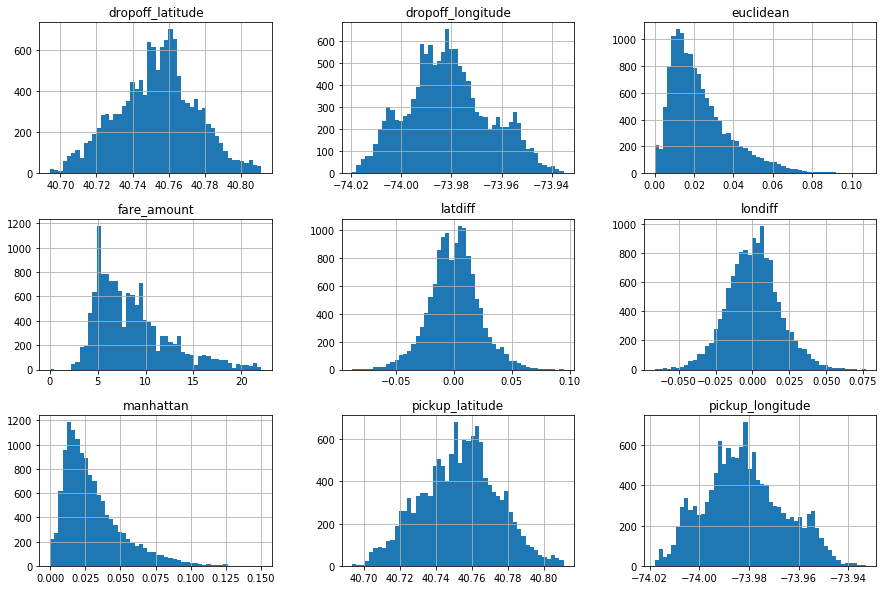

In [40]:
#lets visualize histograms for numeric variables for our data
df.hist(bins=50,figsize=(15,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000E375B70>,
      dtype=object)

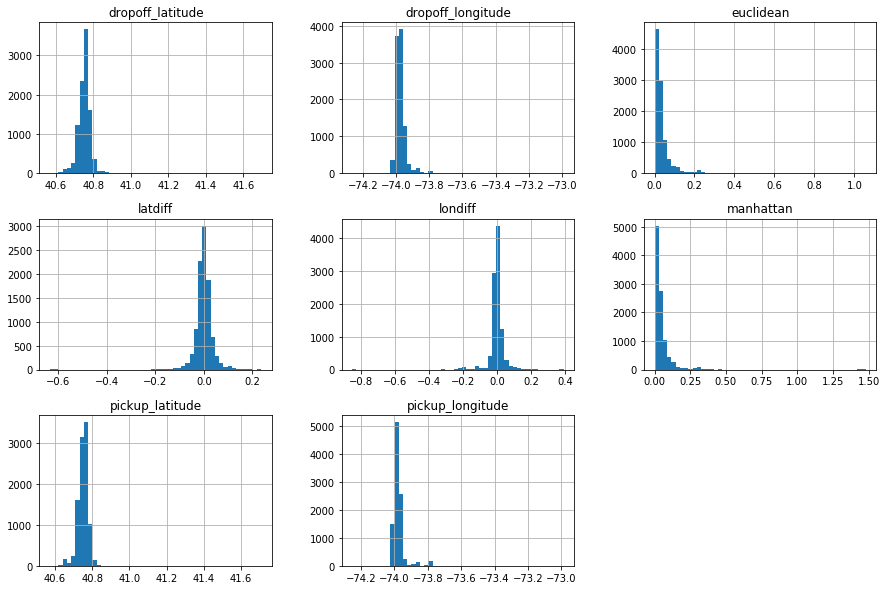

In [41]:
#lets also visualize histograms for numeric variables for our test data
df_test.hist(bins=50,figsize=(15,10))

In [42]:
# Lets plot the graphs for categorical variables

In [43]:
#lets get the list of categorical columns
cat_col = [col for col in df if df[col].dtypes != 'float64' and df[col].dtypes != 'int64']
cat_col

['passenger_count', 'year', 'month', 'date', 'hour', 'weekday']

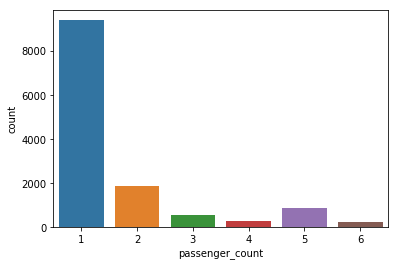

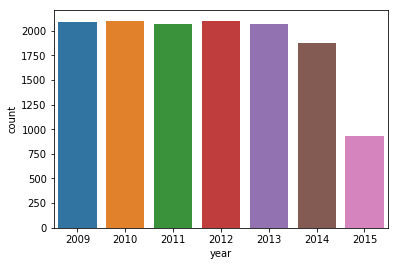

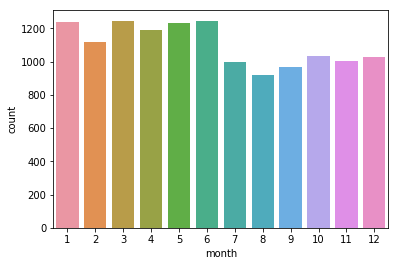

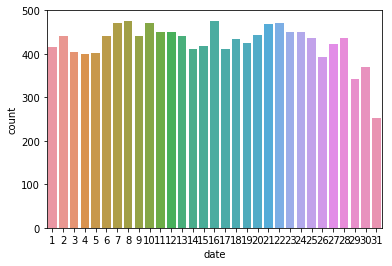

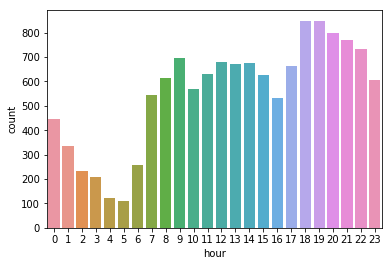

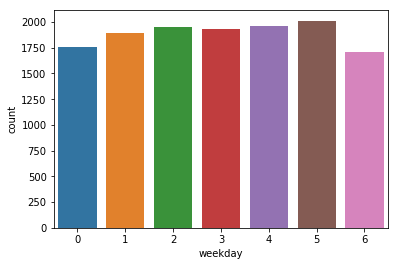

In [44]:
#Lets plot countplot for all categorical columns
for i in cat_col:
    plt.figure()
    sns.countplot(x=i, data=df)

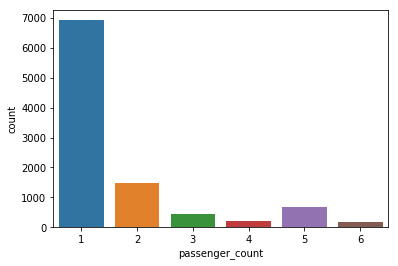

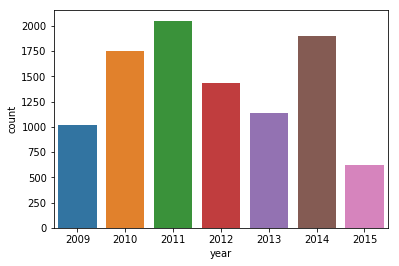

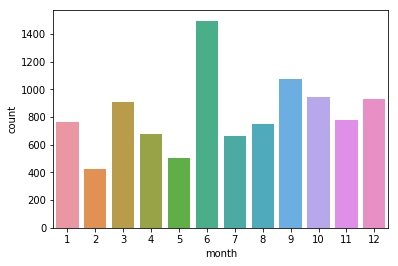

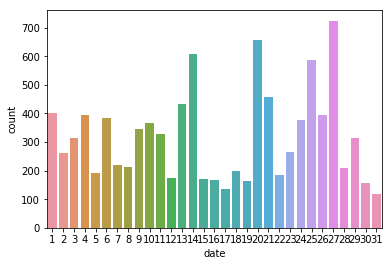

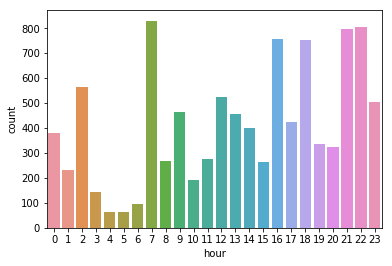

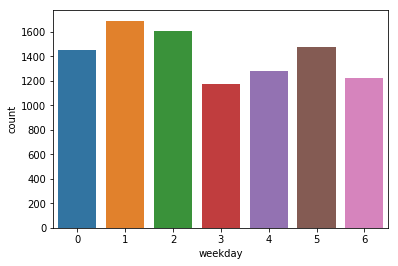

In [45]:
#Lets plot countplot for all categorical columns in test data
for i in cat_col:
    plt.figure()
    sns.countplot(x=i, data=df_test)

In [46]:
# Barplots w.r.t fare_amount

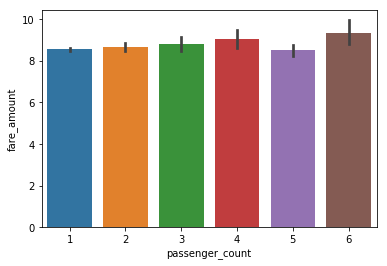

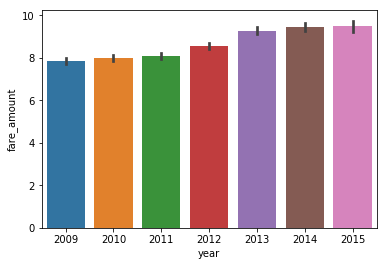

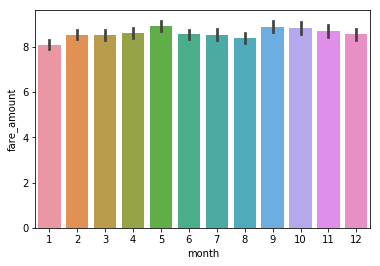

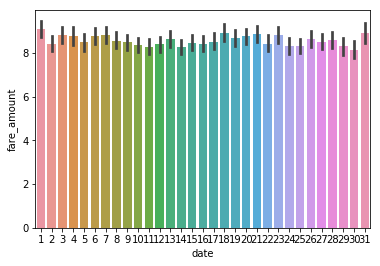

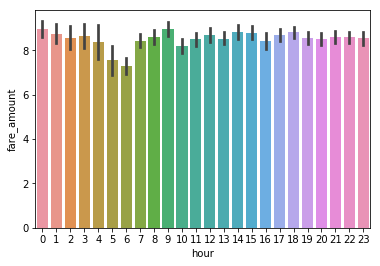

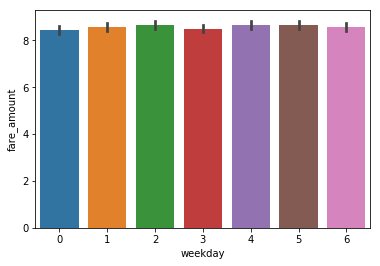

In [47]:
#fare_amount aggregated by mean
for i in cat_col:
    plt.figure()
    sns.barplot(x=i, y= 'fare_amount',data=df)

# Correlation Analysis

In [48]:
# Lets use Pearson Correlation to find correlation between numeric variables

In [49]:
# Lets see correlation between all the numeric variables with each other
df.corr(method = 'pearson')

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,latdiff,londiff,euclidean,manhattan
fare_amount,1.000000,-0.061110,-0.070057,-0.022229,-0.084125,-0.016914,0.034761,0.813722,0.790871
pickup_longitude,-0.061110,1.000000,0.696931,0.410907,0.354482,-0.325432,-0.524803,-0.047160,-0.037938
pickup_latitude,-0.070057,0.696931,1.000000,0.334742,0.505885,-0.469763,-0.320590,-0.063883,-0.060968
dropoff_longitude,-0.022229,0.410907,0.334742,1.000000,0.655744,0.340539,0.560396,0.031385,0.035723
dropoff_latitude,-0.084125,0.354482,0.505885,0.655744,1.000000,0.523852,0.290228,-0.036279,-0.031842
latdiff,-0.016914,-0.325432,-0.469763,0.340539,0.523852,1.000000,0.613601,0.025956,0.027617
londiff,0.034761,-0.524803,-0.320590,0.560396,0.290228,0.613601,1.000000,0.072147,0.067819
euclidean,0.813722,-0.047160,-0.063883,0.031385,-0.036279,0.025956,0.072147,1.000000,0.990724
manhattan,0.790871,-0.037938,-0.060968,0.035723,-0.031842,0.027617,0.067819,0.990724,1.000000


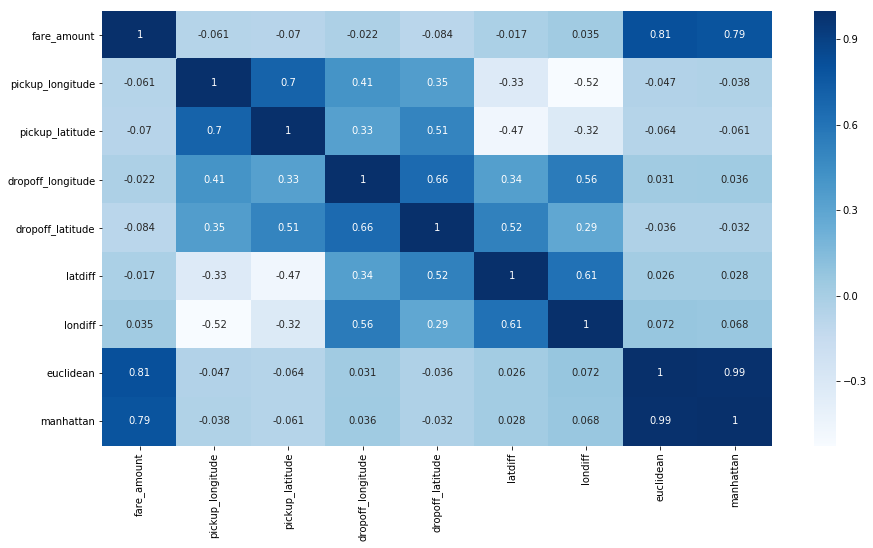

In [50]:
# Lets visualize this using heatmap

plt.figure(figsize = (15,8))
sns.heatmap(df.corr(method = 'pearson'),annot=True,cmap = 'Blues')

In [51]:
# as we can see that manhattan and euclidean distance have maximum correlation with fare amount
#also euclidean and manhattan distance have high correlation with each other, 
#so lets use euclidean distance only between these 2 variables in our model training

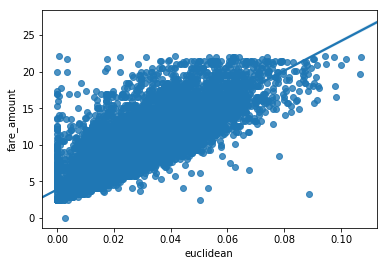

In [52]:
#euclidean has the highest correlation with the fare amount
#Lets visualize regression plot of euclidean and fare amount

sns.regplot(x='euclidean',y='fare_amount',data=df)



# Feature Scaling

In [53]:
#get list of numeric columns for the datafarme except the fare-amount for scaling the indepedent variables
num_scale = [col for col in df.iloc[:,1:] if df[col].dtypes == 'float64']
num_scale

['pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'latdiff',
 'londiff',
 'euclidean',
 'manhattan']

In [54]:
#Nomalisation
for i in num_scale:
    #print(i)
    df[i] = ((df[i]) - (np.min(df[i])))/((np.max(df[i])) - (np.min(df[i])))
    
#head of dataframe
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,date,hour,weekday,latdiff,londiff,euclidean,manhattan
1,16.9,0.024204,0.151664,0.477623,0.748849,1,2010,1,5,16,1,0.868527,0.719760,0.743602,0.715391
2,5.7,0.415583,0.577430,0.335595,0.480509,2,2011,8,18,0,3,0.421728,0.403685,0.127586,0.127875
3,7.7,0.363979,0.337761,0.331740,0.544773,1,2012,4,21,4,5,0.617425,0.432072,0.236440,0.195592
4,5.3,0.587632,0.634844,0.745846,0.763852,1,2010,3,9,7,1,0.566960,0.542891,0.181661,0.181003
5,12.1,0.201435,0.324869,0.553252,0.545977,1,2011,1,6,9,3,0.626503,0.658980,0.360858,0.363915


In [55]:
#get list of numeric columns for the test data
num_scale = [col for col in df_test if df_test[col].dtypes == 'float64']
num_scale

['pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'latdiff',
 'londiff',
 'euclidean',
 'manhattan']

In [56]:
#Lets also normalise the test data df_test
for i in num_scale:
    #print(i)
    df_test[i] = ((df_test[i]) - (np.min(df_test[i])))/((np.max(df_test[i])) - (np.min(df_test[i])))
    
#view head
df_test.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,date,hour,weekday,latdiff,londiff,euclidean,manhattan
0,0.220338,0.167776,0.221502,0.155060,1,2015,1,27,13,1,0.704597,0.677250,0.020385,0.018973
1,0.209638,0.128686,0.207781,0.150950,1,2015,1,27,13,1,0.750311,0.674099,0.021923,0.021515
2,0.213066,0.156736,0.222898,0.157102,1,2011,10,8,11,5,0.721658,0.686092,0.005552,0.005399
3,0.214143,0.171297,0.214414,0.161976,1,2012,12,1,21,5,0.708961,0.676302,0.017638,0.017203
4,0.226085,0.190628,0.215894,0.155584,1,2012,12,1,21,5,0.675438,0.665648,0.047886,0.045857


# Model Development

In [57]:
# since our target variable is continuous , we will use regression algorithms
# we will use Multiple linear regression, decision tree regressor, random forest regressor machine learning algorithms to predict fare amount

In [58]:
# import libraries used for model development

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [59]:
#separate depedent and indepedent variables
X = df.drop(['fare_amount','manhattan'],axis = 1)
y = df['fare_amount']

# Perform test train split
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 1)

In [111]:
#fit regression
lin_reg = LinearRegression()
print(lin_reg.fit(X_train, y_train))
#fit decision tree
tree = DecisionTreeRegressor(random_state=1)
print(tree.fit(X_train, y_train))
#fit random forest
forest = RandomForestRegressor(random_state=1,n_estimators = 500,max_features=4)
print(forest.fit(X_train, y_train))


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=1, splitter='best')
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=4, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=500,
                      n_jobs=None, oob_score=False, random_state=1, verbose=0,
                      warm_start=False)


In [61]:
coeff_df = pd.DataFrame(lin_reg.coef_,X.columns,columns=['Coefficient'])
coeff_df.sort_values('Coefficient',ascending=False)

,Coefficient
euclidean,21.923810
year,0.364953
month,0.061072
passenger_count,0.050777
hour,0.013388
pickup_latitude,0.005690
date,-0.000111
weekday,-0.034904
londiff,-0.050002
pickup_longitude,-0.163240


In [124]:

import statsmodels.api as sm

#num = [col for col in X_train if X_train[col].dtypes == 'float64']

#model = sm.OLS(y_train, X_train[num]).fit()
model = sm.OLS(y_train, X_train).fit()
#predictions = model.predict(X_test[num]) # make the predictions by the model
predictions = model.predict(X_test)
# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            fare_amount   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     2002.
Date:                Mon, 22 Jul 2019   Prob (F-statistic):               0.00
Time:                        18:04:36   Log-Likelihood:                -20017.
No. Observations:                9251   AIC:                         4.006e+04
Df Residuals:                    9239   BIC:                         4.014e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
pickup_longitude   -464.0346     15.108    -30.714      0.000    -493.650    -434.419
pickup_latitude    -499.9549     16.283    -30.704      0.000    -531.873    -468.036
dropoff_longitude   459.2486     14.965     30.688      0.000     429.914     488.583
dropoff_latitude    498.3337     16.259     30.651      0.000     466.463     530.204
passenger_count       0.0508      0.017      2.907      0.004       0.017       0.085
year                  0.3650      0.012     30.887      0.000       0.342       0.388
month                 0.0611      0.006      9.522      0.000       0.048       0.074
date                 -0.0001      0.003     -0.044      0.965      -0.005       0.005
hour                  0.0134      0.003      3.833      0.000       0.007       0.020
weekday              -0.0349      0.011     -3.087      0.002      -0.057      -0.013
latdiff            -776.7586     25.281    -30.725      0.000    -826.315    -727.202
londiff            -780.9144     25.433    -30.705      0.000    -830.769    -731.060
euclidean            21.9238      0.152    143.999      0.000      21.625      22.222
==============================================================================
Omnibus:                     3103.631   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18573.849
Skew:                           1.481   Prob(JB):                         0.00
Kurtosis:                       9.278   Cond. No.                     1.49e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.69e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [110]:
#lets create empty dataframe to store model results 
result_df_train = pd.DataFrame()
result_df_test = pd.DataFrame()


## Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [112]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(n_estimators=500)
gbrt.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [113]:
models = [('GB',gbrt)]
for i, model in models:
    #predict on train data
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    #calculate error metrics
    MSE = mean_squared_error(y_test,pred_test)
    RMSE = np.sqrt(MSE)
    errors_test = np.abs(pred_test - y_test)
    MAE = metrics.mean_absolute_error(pred_test,y_test)
    MAPE = np.mean(100 * (errors_test / y_test))
    Accuracy = 100 - MAPE
    R2Score = r2_score(y_test,pred_test)
    
    
    result_df_test.loc[i,'MSE'] = round(MSE,2)
    result_df_test.loc[i,'RMSE'] = round(RMSE,2)
    result_df_test.loc[i,'MAE'] = round(MAE,2)
    result_df_test.loc[i,'MAPE'] = round(MAPE,2)
    result_df_test.loc[i,'Accuracy'] = round(Accuracy,2)
    result_df_test.loc[i,'R2Score'] = round(R2Score,2)
    
    
    #calculate error metrics
    MSE_train = mean_squared_error(y_train, pred_train)
    RMSE_train = np.sqrt(MSE_train)
    errors_train = np.abs(pred_train - y_train)
    MAE_train = metrics.mean_absolute_error(pred_train,y_train)
    MAPE_train = np.mean(100 * (errors_train / y_train))
    Accuracy_train = 100 - MAPE_train
    R2Score_train = r2_score(y_train,pred_train)
    
    result_df_train.loc[i,'MSE'] = round(MSE_train,2)
    result_df_train.loc[i,'RMSE'] = round(RMSE_train,2)
    result_df_train.loc[i,'MAE'] = round(MAE_train,2)
    result_df_train.loc[i,'MAPE'] = round(MAPE_train,2)
    result_df_train.loc[i,'Accuracy'] = round(Accuracy_train,2)
    result_df_train.loc[i,'R2Score'] = round(R2Score_train,2)
    

In [114]:
models= [('lin_reg', lin_reg), ('random forest', forest), ('decision tree', tree)]
from sklearn.metrics import mean_squared_error
for i, model in models:
    #predict on train data
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    #calculate error metrics
    MSE = mean_squared_error(y_test,pred_test)
    RMSE = np.sqrt(MSE)
    errors_test = np.abs(pred_test - y_test)
    MAE = metrics.mean_absolute_error(pred_test,y_test)
    MAPE = np.mean(100 * (errors_test / y_test))
    Accuracy = 100 - MAPE
    R2Score = r2_score(y_test,pred_test)
    
    
    result_df_test.loc[i,'MSE'] = round(MSE,2)
    result_df_test.loc[i,'RMSE'] = round(RMSE,2)
    result_df_test.loc[i,'MAE'] = round(MAE,2)
    result_df_test.loc[i,'MAPE'] = round(MAPE,2)
    result_df_test.loc[i,'Accuracy'] = round(Accuracy,2)
    result_df_test.loc[i,'R2Score'] = round(R2Score,2)
    
    
    #calculate error metrics
    MSE_train = mean_squared_error(y_train, pred_train)
    RMSE_train = np.sqrt(MSE_train)
    errors_train = np.abs(pred_train - y_train)
    MAE_train = metrics.mean_absolute_error(pred_train,y_train)
    MAPE_train = np.mean(100 * (errors_train / y_train))
    Accuracy_train = 100 - MAPE_train
    R2Score_train = r2_score(y_train,pred_train)
    
    result_df_train.loc[i,'MSE'] = round(MSE_train,2)
    result_df_train.loc[i,'RMSE'] = round(RMSE_train,2)
    result_df_train.loc[i,'MAE'] = round(MAE_train,2)
    result_df_train.loc[i,'MAPE'] = round(MAPE_train,2)
    result_df_train.loc[i,'Accuracy'] = round(Accuracy_train,2)
    result_df_train.loc[i,'R2Score'] = round(R2Score_train,2)
    

In [115]:
result_df_train.sort_values('Accuracy',ascending=False)

,MSE,RMSE,MAE,MAPE,Accuracy,R2Score
decision tree,0.00,0.00,0.00,0.00,100.00,1.00
random forest,0.50,0.70,0.49,8.26,91.74,0.97
GB,2.09,1.44,1.02,14.06,85.94,0.86
lin_reg,4.44,2.11,1.50,24.40,75.60,0.70


In [116]:
# for training dataset decision tree seems to have the highest accuracy 100 % and 1 R2score
#so decision tree tends to overfit the training data

In [117]:
result_df_test.sort_values('Accuracy',ascending=False)

,MSE,RMSE,MAE,MAPE,Accuracy,R2Score
GB,3.13,1.77,1.22,15.18,84.82,0.77
random forest,3.39,1.84,1.31,16.30,83.70,0.75
lin_reg,4.32,2.08,1.50,18.56,81.44,0.69
decision tree,7.21,2.68,1.88,23.04,76.96,0.48


In [68]:
# for testing dataset random forest perform better as they handle the problem of overfitting imposed by decision trees
# there is marginal difference between RMSE between Random forest and Linear Regression

In [69]:
newdf = result_df_test.reset_index().sort_values('Accuracy',ascending=False)

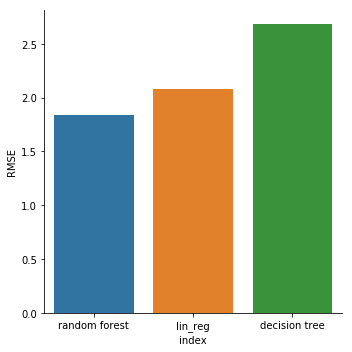

In [70]:
#Lets visualize RMSE for our three models
sns.catplot(x= 'index', y= 'RMSE', data= newdf, kind='bar', legend='True')

In [71]:
# Decision Tree have highest RMSE



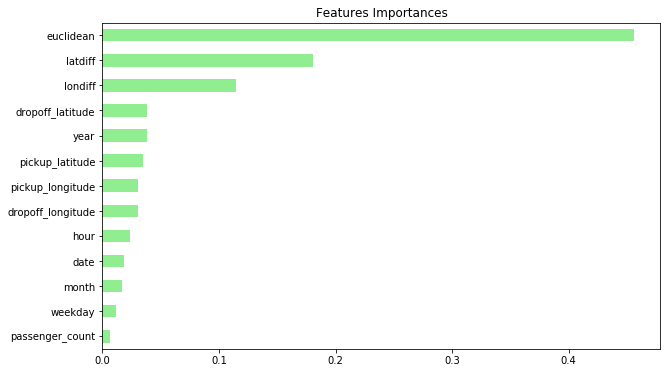

In [72]:
# lets use feature importance and see what are the most import features

importances = pd.Series(data=forest.feature_importances_,
                        index= X_train.columns)

# Sort importances
importances_sorted = importances.sort_values()

plt.figure(figsize=(10,6))

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()

In [73]:
#euclidean is the most important feature and passenger count the least important feature

In [74]:
#So, lets finalize Random forest to predict fare amount on test data

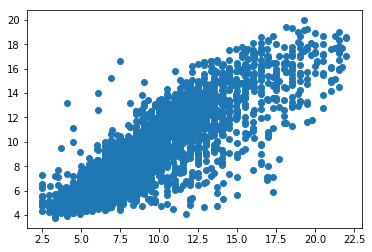

In [75]:
predictions = forest.predict(X_test)
plt.scatter(y_test,predictions)

C:\Users\RDhingra\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


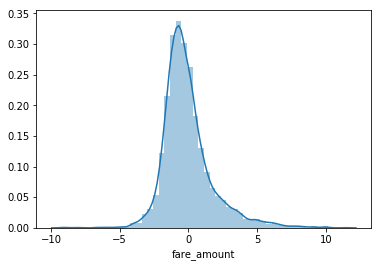

In [76]:
sns.distplot((y_test-predictions),bins=50);

In [77]:
#predict on test data

#pred_validation = forest.predict(df_test.drop('manhattan',axis=1))
#df_test['predicted fare_amount'] = pred_validation

#view test data with additional column for predicted fare-amount
#df_test.head()

In [78]:
#visualize the distribution of the predicted fare amount

#df_test['predicted fare_amount'].hist()

In [79]:
#submission
df_test.to_csv('output.csv')

In [86]:
import xgboost as xgb

In [87]:
xgb.XGBRegressor()

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

# XGBoost Parameters
***

**Important Parameters for Overfitting:**
- **learning_rate**:  Controls the contribution of each tree in the ensemble (optimal values between 0.01-0.2). ESL states that the best strategy might be to set learning_rate low (<0.1) and then choose n_estimators by early stopping.
- **max_depth**: Controls the depth of the tree. More depth = more complexity, more variance, and slower computation speed. (Optimal values between 4-8)
- **min_child_weight**: (default is 1)
- **n_estimators**: number of boosting trees

In [88]:
# Create empty array to store results
results = []

# Create watchlist to keep track of train/validation performance
eval_set = [(X_train, y_train), (X_test, y_test)]

In [90]:
for i in X_train:
    X_train[i] = pd.to_numeric(X_train[i])
    


C:\Users\RDhingra\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [92]:
for i in X_test:
    X_test[i] = pd.to_numeric(X_test[i])
    

C:\Users\RDhingra\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [91]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9251 entries, 12878 to 283
Data columns (total 13 columns):
pickup_longitude     9251 non-null float64
pickup_latitude      9251 non-null float64
dropoff_longitude    9251 non-null float64
dropoff_latitude     9251 non-null float64
passenger_count      9251 non-null int64
year                 9251 non-null int64
month                9251 non-null int64
date                 9251 non-null int64
hour                 9251 non-null int64
weekday              9251 non-null int64
latdiff              9251 non-null float64
londiff              9251 non-null float64
euclidean            9251 non-null float64
dtypes: float64(7), int64(6)
memory usage: 1011.8 KB


In [93]:
# Enumerate through different max_depth values and store results
for max_depth in [2,3,4,5,10,12,15]:
    clf = xgb.XGBRegressor(max_depth=max_depth)
    clf.fit(X_train, y_train, eval_set=eval_set, verbose=False,)
    results.append(
        {
            'max_depth': max_depth,
            'train_error': metrics.mean_squared_error(y_train, clf.predict(X_train)),
            'test_error': metrics.mean_squared_error(y_test, clf.predict(X_test))
        })
    
# Display Results
max_depth_lr = pd.DataFrame(results).set_index('max_depth').sort_index()
max_depth_lr

C:\Users\RDhingra\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:03:32] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\RDhingra\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:03:37] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\RDhingra\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:03:42] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\RDhingra\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:03:46] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\RDhingra\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:03:51] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\RDhingra\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:03:58] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\RDhingra\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:04:04] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,test_error,train_error
max_depth,,
2,3.666108,3.646547
3,3.434800,3.217665
4,3.208062,2.723077
5,3.114980,2.228808
10,3.305481,0.243783
12,3.362585,0.053468
15,3.546319,0.004681


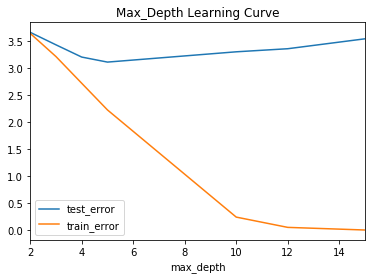

In [94]:
# Plot Max_Depth Learning Curve
max_depth_lr.plot(title="Max_Depth Learning Curve")

In [97]:
# Reset results array
results = []

for learning_rate in [0.05,0.1,0.2,0.4,0.6,0.8,1]:
    clf = xgb.XGBRegressor(max_depth=5,learning_rate=learning_rate)
    clf.fit(X_train, y_train, eval_set=eval_set, verbose=False)
    results.append(
        {
            'learning_rate': learning_rate,
            'train_error': metrics.mean_squared_error(y_train, clf.predict(X_train)),
            'test_error': metrics.mean_squared_error(y_test, clf.predict(X_test))
        })
    
learning_rate_lr = pd.DataFrame(results).set_index('learning_rate').sort_index()
learning_rate_lr

C:\Users\RDhingra\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:06:53] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\RDhingra\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:06:58] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\RDhingra\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:07:02] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\RDhingra\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:07:09] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\RDhingra\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:07:14] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\RDhingra\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:07:20] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\RDhingra\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:07:26] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,test_error,train_error
learning_rate,,
0.05,3.360571,2.860247
0.10,3.114980,2.228808
0.20,3.084249,1.700685
0.40,3.275274,1.165125
0.60,3.726505,0.863169
0.80,4.127596,0.737215
1.00,4.846178,0.584988


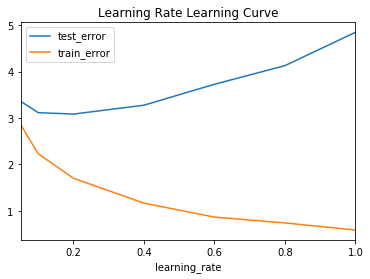

In [98]:
# Plot Learning Rate
learning_rate_lr.plot(title="Learning Rate Learning Curve")

In [99]:
# Reset results array
results = []

for n_estimators in [50,60,100,150,200,500,750,1000, 1500]:
    clf = xgb.XGBRegressor(max_depth=5,learning_rate=0.1, n_estimators=n_estimators)
    clf.fit(X_train, y_train, eval_set=eval_set, verbose=False)
    results.append(
        {
            'n_estimators': n_estimators,
            'train_error': metrics.mean_squared_error(y_train, clf.predict(X_train)),
            'test_error': metrics.mean_squared_error(y_test, clf.predict(X_test))
        })
    
n_estimators_lr = pd.DataFrame(results).set_index('n_estimators').sort_index()
n_estimators_lr

C:\Users\RDhingra\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:08:02] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\RDhingra\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:08:06] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\RDhingra\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:08:10] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\RDhingra\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:08:16] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\RDhingra\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:08:25] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\RDhingra\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:08:37] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\RDhingra\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:09:05] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\RDhingra\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:09:43] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\RDhingra\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:10:23] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,test_error,train_error
n_estimators,,
50,3.324465,2.822486
60,3.258526,2.658281
100,3.114980,2.228808
150,3.043585,1.900122
200,3.015825,1.681411
500,3.018797,0.937111
750,3.046270,0.646627
1000,3.082037,0.449102
1500,3.119704,0.227302


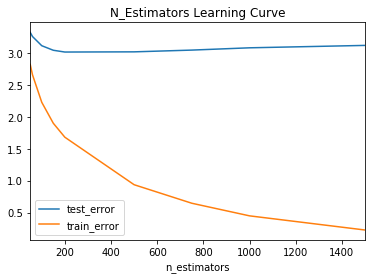

In [100]:
n_estimators_lr.plot(title="N_Estimators Learning Curve")

In [101]:
model = xgb.XGBRegressor()

In [102]:
# Define Parameters
param_grid = {"max_depth": [2,3,5],
              "max_features" : [1.0,0.3,0.1],
              "min_samples_leaf" : [3,5,9],
              "n_estimators": [50,100,200,500],
              "learning_rate": [0.05,0.1,0.02,0.2]}

In [103]:
# Perform Grid Search CV
gs_cv = GridSearchCV(model, param_grid=param_grid, cv = 3, verbose=5,n_jobs=-1).fit(X_train,y_train)

Fitting 3 folds for each of 432 candidates, totalling 1296 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   28.9s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   58.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  9.6min
[Parallel(n_jobs=-1)]: Done 874 tasks      | elapsed: 12.6min
[Parallel(n_jobs=-1)]: Done 1144 tasks      | elapsed: 16.5min
[Parallel(n_jobs=-1)]: Done 1296 out of 1296 | elapsed: 19.7min finished
C:\Users\RDhingra\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:33:28] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [104]:
# Best hyperparmeter setting
gs_cv.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.2, max_delta_step=0,
             max_depth=3, max_features=1.0, min_child_weight=1,
             min_samples_leaf=3, missing=None, n_estimators=200, n_jobs=1,
             nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
             subsample=1, verbosity=1)

In [118]:
# Use our best model parameters found by GridSearchCV
best_model = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.2, max_delta_step=0,
             max_depth=3, max_features=1.0, min_child_weight=1,
             min_samples_leaf=3, missing=None, n_estimators=200, n_jobs=1,
             nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
             subsample=1, verbosity=1)

In [119]:
# Create eval_set
eval_set = [(X_train, y_train), (X_test, y_test)]

# Fit our model to the training set
best_model.fit(X_train, y_train, eval_set=eval_set, verbose=False)

C:\Users\RDhingra\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:01:53] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.2, max_delta_step=0,
             max_depth=3, max_features=1.0, min_child_weight=1,
             min_samples_leaf=3, missing=None, n_estimators=200, n_jobs=1,
             nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
             subsample=1, verbosity=1)

In [120]:
models = [('best_model', best_model)]
for i, model in models:
    #predict on train data
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    #calculate error metrics
    MSE = mean_squared_error(y_test,pred_test)
    RMSE = np.sqrt(MSE)
    errors_test = np.abs(pred_test - y_test)
    MAE = metrics.mean_absolute_error(pred_test,y_test)
    MAPE = np.mean(100 * (errors_test / y_test))
    Accuracy = 100 - MAPE
    R2Score = r2_score(y_test,pred_test)
    
    
    result_df_test.loc[i,'MSE'] = round(MSE,2)
    result_df_test.loc[i,'RMSE'] = round(RMSE,2)
    result_df_test.loc[i,'MAE'] = round(MAE,2)
    result_df_test.loc[i,'MAPE'] = round(MAPE,2)
    result_df_test.loc[i,'Accuracy'] = round(Accuracy,2)
    result_df_test.loc[i,'R2Score'] = round(R2Score,2)
    
    
    #calculate error metrics
    MSE_train = mean_squared_error(y_train, pred_train)
    RMSE_train = np.sqrt(MSE_train)
    errors_train = np.abs(pred_train - y_train)
    MAE_train = metrics.mean_absolute_error(pred_train,y_train)
    MAPE_train = np.mean(100 * (errors_train / y_train))
    Accuracy_train = 100 - MAPE_train
    R2Score_train = r2_score(y_train,pred_train)
    
    result_df_train.loc[i,'MSE'] = round(MSE_train,2)
    result_df_train.loc[i,'RMSE'] = round(RMSE_train,2)
    result_df_train.loc[i,'MAE'] = round(MAE_train,2)
    result_df_train.loc[i,'MAPE'] = round(MAPE_train,2)
    result_df_train.loc[i,'Accuracy'] = round(Accuracy_train,2)
    result_df_train.loc[i,'R2Score'] = round(R2Score_train,2)
    

In [121]:
result_df_test

,MSE,RMSE,MAE,MAPE,Accuracy,R2Score
GB,3.13,1.77,1.22,15.18,84.82,0.77
lin_reg,4.32,2.08,1.50,18.56,81.44,0.69
random forest,3.39,1.84,1.31,16.30,83.70,0.75
decision tree,7.21,2.68,1.88,23.04,76.96,0.48
best_model,3.18,1.78,1.24,15.31,84.69,0.77


In [122]:
result_df_train

,MSE,RMSE,MAE,MAPE,Accuracy,R2Score
GB,2.09,1.44,1.02,14.06,85.94,0.86
lin_reg,4.44,2.11,1.50,24.40,75.60,0.70
random forest,0.50,0.70,0.49,8.26,91.74,0.97
decision tree,0.00,0.00,0.00,0.00,100.00,1.00
best_model,2.34,1.53,1.07,14.88,85.12,0.84


In [ ]:
"""

MSE	RMSE	MAE	MAPE	Accuracy	R2Score
lin_reg	4.32	2.08	1.50	18.56	81.44	0.69
random forest	3.39	1.84	1.31	16.30	83.70	0.75
decision tree	7.21	2.68	1.88	23.04	76.96	0.48
GB	3.12	1.77	1.22	15.18	84.82	0.77
best_model	3.18	1.78	1.24	15.31	84.69	0.77


"""

In [123]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9251 entries, 12878 to 283
Data columns (total 13 columns):
pickup_longitude     9251 non-null float64
pickup_latitude      9251 non-null float64
dropoff_longitude    9251 non-null float64
dropoff_latitude     9251 non-null float64
passenger_count      9251 non-null int64
year                 9251 non-null int64
month                9251 non-null int64
date                 9251 non-null int64
hour                 9251 non-null int64
weekday              9251 non-null int64
latdiff              9251 non-null float64
londiff              9251 non-null float64
euclidean            9251 non-null float64
dtypes: float64(7), int64(6)
memory usage: 1011.8 KB
